## 线性回归初探

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
rate=pd.read_csv("D:/takehome/conversion_data.csv")

In [2]:
rate.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
res = smf.ols(formula='total_pages_visited ~ age + new_user+C(country)', data=rate).fit()

In [4]:
print(res.summary())

                             OLS Regression Results                            
Dep. Variable:     total_pages_visited   R-squared:                       0.012
Model:                             OLS   Adj. R-squared:                  0.012
Method:                  Least Squares   F-statistic:                     767.7
Date:                 Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                         11:49:41   Log-Likelihood:            -8.2819e+05
No. Observations:               316200   AIC:                         1.656e+06
Df Residuals:                   316194   BIC:                         1.656e+06
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept           

In [5]:
rate['pred'] = res.predict()

In [6]:
rate.head()

,country,age,new_user,source,total_pages_visited,converted,pred
0,UK,25,1,Ads,1,0,4.993182
1,US,23,1,Seo,5,0,4.880399
2,US,28,1,Seo,4,0,4.790633
3,China,39,1,Seo,5,0,4.228075
4,US,30,1,Seo,6,0,4.754727


In [7]:
res.predict(pd.DataFrame({'age': 24, 
                                          'country': ['UK'],'new_user':1}))

0    5.011135
dtype: float64

## 逻辑回归初探

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
rate=pd.read_csv("D:/takehome/conversion_data.csv")

In [9]:
rate.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
res = smf.logit(formula='converted ~ age + new_user+total_pages_visited+C(country)+C(source)', data=rate).fit()

Optimization terminated successfully.
         Current function value: 0.040647
         Iterations 11


In [11]:
print(res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               316200
Model:                          Logit   Df Residuals:                   316191
Method:                           MLE   Df Model:                            8
Date:                Thu, 01 Oct 2020   Pseudo R-squ.:                  0.7148
Time:                        11:49:52   Log-Likelihood:                -12853.
converged:                       True   LL-Null:                       -45060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -10.3652      0.150    -68.909      0.000     -10.660     -10.070
C(country)[T.Germany]     3.8189      0.132     28.918      0.000       3.560       4.078
C(countr

In [12]:
rate['pred'] = res.predict()
rate.loc[rate.pred>=0.5,'pred1']=1
rate.loc[rate.pred<0.5,'pred1']=0
rate['pred1']=rate['pred1'].astype(int)

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(rate['converted'], rate['pred1'])
confusion_matrix

array([[304798,   1202],
       [  3166,   7034]], dtype=int64)

In [14]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(rate['converted'], rate['pred1']))
print("Precision:",metrics.precision_score(rate['converted'], rate['pred1']))
print("Recall:",metrics.recall_score(rate['converted'], rate['pred1']))

Accuracy: 0.9861859582542695
Precision: 0.8540553666828558
Recall: 0.6896078431372549


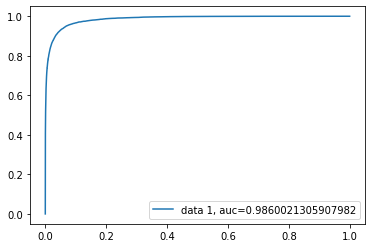

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, _ = metrics.roc_curve(rate['converted'], rate['pred'])
auc = metrics.roc_auc_score(rate['converted'], rate['pred'])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()